In [37]:
#Assumed imports
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
# import mglearn
from IPython.display import display

Importing the needed libraries first, for the classic example I already did before, but useful to do anyway, the IRIS Species classification.

In [38]:
from sklearn.datasets import load_iris
irisDataSet = load_iris()
print(irisDataSet.keys())#Print the keys in the dataset...

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [39]:
print("Target names: {}".format(irisDataSet['target_names']))
#Print the target names of the dataset, what we are trying to predict 
print("Feature names: {}".format(irisDataSet['feature_names']))
#description of the features
print("Shape of data: {}".format(irisDataSet['data'].shape))
#Prints the shape of the dataset

Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data: (150, 4)


In [40]:
print("First ten rows of data:\n{}".format(irisDataSet['data'][:10]))
#First five flowers have atleast cm of 0.2 and look at the lengths

First ten rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [41]:
#time to train and test the data!!!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(irisDataSet['data'],irisDataSet['target'], random_state = 0)
#Train the dataset, two parts
#split it into a training and testing data set to make sure it works well 

In [42]:
#to showcase what this memes...
print("Training data...")
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
#Print the training data
#and then the testing data...
print("Testing data...")
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))
#Adds up to 150 in the end

Training data...
X_train shape: (112, 4)
y_train shape: (112,)
Testing data...
X_test shape: (38, 4)
y_test shape: (38,)


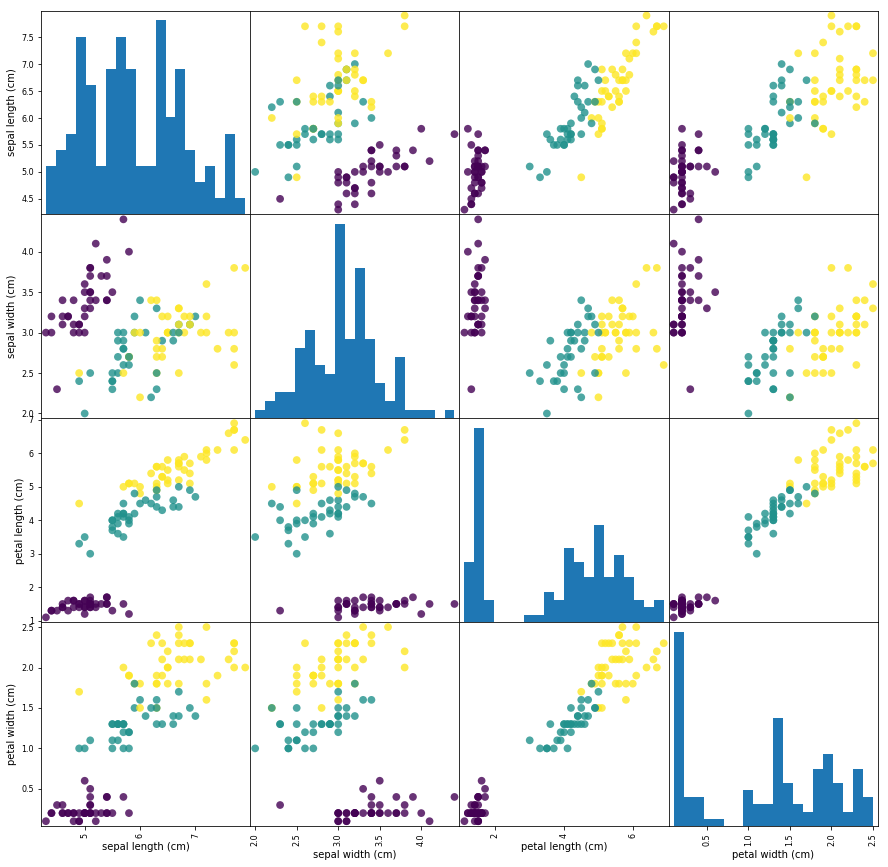

In [43]:
#However before we run in, lets graph our data, so we know what we are looking at!
irisDataFrame = pd.DataFrame(X_train, columns=irisDataSet.feature_names)
pd.plotting.scatter_matrix(irisDataFrame, c=y_train, figsize=(15,15),
                          marker='o', hist_kwds={'bins': 20}, s=60,
                          alpha=.8)
plt.show()
#Show the data!!!

In [44]:
#deploy the first model, we are using nearest neigbors in this case...
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [45]:
knn.fit(X_train, y_train) #Shows the training labels of the dataset

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [46]:
XNew = np.array([[5,2.9,1,0.2]]) #Time to make predictions
print("XNew Shape: {}".format(XNew.shape))#Print shape of array

XNew Shape: (1, 4)


In [47]:
prediction = knn.predict(XNew)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(irisDataSet['target_names'][prediction]))
#Predicts new iris belongs into class of zero, otherwise known as setosa

Prediction: [0]
Predicted target name: ['setosa']


In [48]:
#lets do it again!
XNew2 = np.array([[7,1.9,4,3.2]]) #Time to make predictions
prediction2 = knn.predict(XNew2)
print("Prediction: {}".format(prediction2))
print("Predicted target name: {}".format(irisDataSet['target_names'][prediction2]))
#Predicts that these cm sizes would be the class of virginica

Prediction: [2]
Predicted target name: ['virginica']


In [49]:
#Evaulating the model...
y_pred = knn.predict(X_test)
print("test set predictions... :\n {}".format(y_pred))
#Finally the testscore predictions...
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

test set predictions... :
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score: 0.97
